## Visualize Match Data

Data source: https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
dataset = pd.read_csv('results.csv')
dataset.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False


### Histogram of home goals, away goals, goal diff

In [58]:
def get_count_for_column_values(col_name):
    return dataset.groupby(col_name).count().iloc[:,0:1].rename(columns={"date": "count"}).reset_index()

<Figure size 1440x432 with 0 Axes>

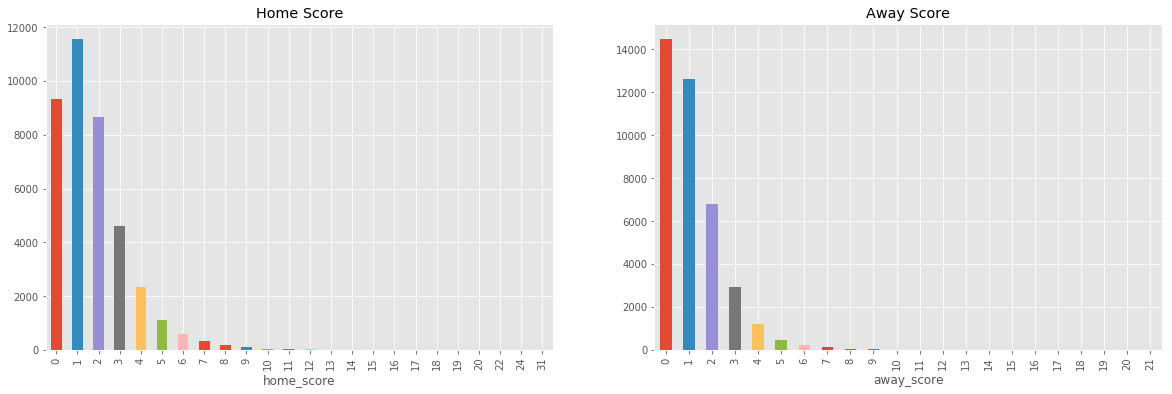

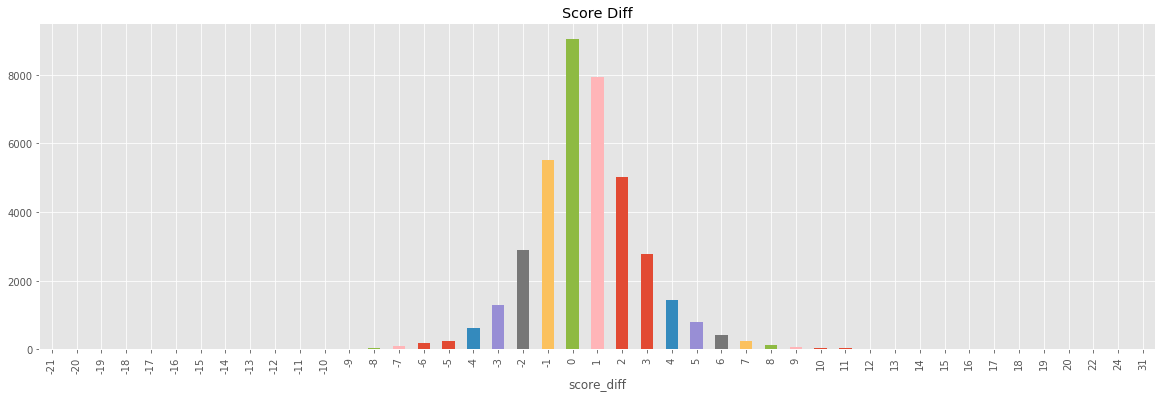

In [70]:
plt.figure(figsize=(20, 6))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Home score
home_scores = get_count_for_column_values("home_score")
home_scores.plot.bar(x="home_score", y="count", ax=axes[0], legend=False)
axes[0].set_title('Home Score')

# Away score
away_scores = get_count_for_column_values("away_score")
away_scores.plot.bar(x="away_score", y="count", ax=axes[1],legend=False)
axes[1].set_title('Away Score')

# Score Diff
dataset["score_diff"] = dataset["home_score"] - dataset["away_score"]
score_diff = get_count_for_column_values("score_diff")
score_diff.plot.bar(x="score_diff", y="count",legend=False, title='Score Diff', figsize=(20, 6))


### Win/Draw/Lose (Home)

[Text(0,0,'Lose'), Text(0,0,'Draw'), Text(0,0,'Win')]

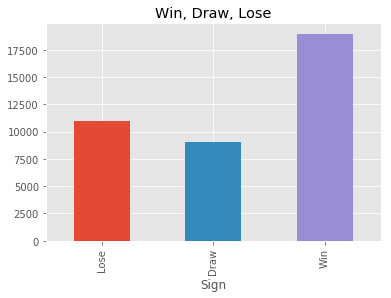

In [77]:
dataset["Sign"] = np.sign(dataset["home_score"] - dataset["away_score"])
home_win = get_count_for_column_values("Sign")
ax = home_win.plot.bar(x="Sign", y="count", legend=False, title='Win, Draw, Lose')
ax.set_xticklabels(["Lose", "Draw", "Win"])

## Average goals

In [82]:
print("AVG home score", dataset["home_score"].mean())
print("AVG away score", dataset["away_score"].mean())
print("AVG goal diff", (dataset["home_score"] - dataset["away_score"]).mean())

AVG home score 1.7401302297
AVG away score 1.18009126333
AVG goal diff 0.560038966366


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
result,1 - 0,1 - 1,0 - 0,2 - 0,2 - 1,0 - 1,1 - 2,3 - 0,0 - 2,2 - 2,3 - 1,4 - 0,1 - 3,0 - 3,3 - 2,4 - 1
count,3993,3919,3209,3067,2997,2728,2023,1832,1738,1577,1514,1024,906,834,793,773
ratio,0.102364,0.100467,0.0822652,0.0786249,0.0768304,0.0699344,0.0518612,0.0469647,0.044555,0.0404276,0.0388126,0.026251,0.023226,0.0213802,0.0203292,0.0198164


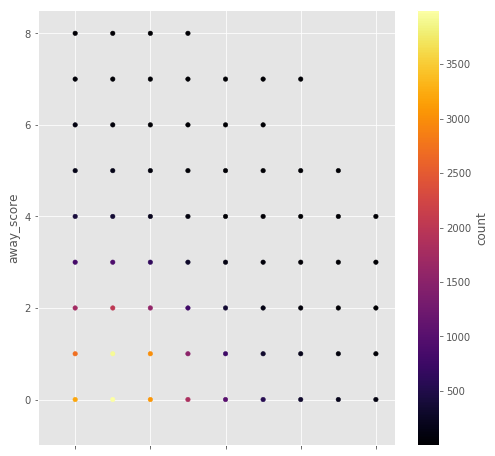

In [137]:
score_df = get_count_for_column_values(["home_score", "away_score"])
ax = score_df.plot.scatter(x="home_score", y="away_score", c="count",
                     colormap='inferno', figsize=(8, 8))
ax.set_xlim([-1, 8.5])
ax.set_ylim([-1, 8.5])

score_df["result"] = score_df[['home_score', 'away_score']].astype(str).apply(lambda x: ' - '.join(x), axis=1)
score_df["ratio"] = score_df["count"] / dataset.shape[0] 
score_df = score_df.sort_values(["count"], ascending=False).reset_index()
score_df.head(16)[["result", "count", "ratio"]].T